## Chapter 3 Homework Solutions 

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd

### Chapter 3 - Lecture 1

### Question 1: Monte Carlo estimation of an expectation

We want to compute $$ \mathbb{E}\left[ |Z|^{2/3} (|Z| + 1) \right] $$ where $Z \sim \mathcal{N}(0,1)$.

This expectation does not have a simple closed form, so we approximate it using Monte Carlo simulation.

If $Z_1, \dots, Z_N$ are i.i.d. standard normal samples the Monte Carlo estimator is $$ \hat{\mu}_N = \frac{1}{N} \sum_{i=1}^N |Z_i|^{2/3} (|Z_i| + 1)$$
By the Law of Large Numbers, $\hat{\mu}_N \to \mathbb{E}[|Z|^{2/3}(|Z|+1)]$
as $N \to \infty$.


In [2]:
np.random.seed(123)
N = 1000000
Z = np.random.randn(N)
g = np.abs(Z)**(2/3) * (np.abs(Z) + 1)
estimate = np.mean(g)

print(estimate)

1.7009115207516659


### Question 2: Monte Carlo integration over a rectangle

We want to compute $$\int_0^1 \int_0^2 (x + 2y) \ln(3x + 2y + 1) dx dy$$

Make the change of variables $$ x = u, \quad y = 2v$$ so that $(u,v) \in [0,1]^2$.

The Jacobian determinant is $|J| = 2$ (recall second year calculus) and the integral becomes $$\int_0^1 \int_0^1 2(u + 4v) \ln(3u + 4v + 1) du dv$$
This can be written as an expectation $$\mathbb{E}\left[ 2(U + 4V)\ln(3U + 4V + 1) \right]$$ where $U, V \sim \text{Uniform}(0,1)$.


In [3]:
N = 1000000
U = np.random.rand(N)
V = np.random.rand(N)
f = 2 * (U + 4*V) * np.log(3*U + 4*V + 1)
estimate = np.mean(f)
print(estimate)

7.994845164894695


### Chapter 3 - Lecture 2

Let $U \sim \text{Uniform}(0,1)$. Then

$$\mathbb{E}(U^3) = \int_0^1 u^3 \, du = \frac{1}{4}$$

$$\mathrm{Var}(U^3) = \mathbb{E}(U^6) - \left(\mathbb{E}(U^3)\right)^2$$

Since $$\mathbb{E}(U^6) = \int_0^1 u^6 \, du = \frac{1}{7}$$ we get $$\mathrm{Var}(U^3) = \frac{1}{7} - \left(\frac{1}{4}\right)^2 = \frac{9}{112}$$

#### Required number of simulations

Let $$\hat{\theta}_n = \frac{1}{n} \sum_{i=1}^n U_i^3$$ be the Monte Carlo estimator of $\theta$.

By the Central Limit Theorem 
$$
\mathbb{P}\left( |\hat{\theta}_n - \theta| \le z_{1-\alpha/2} \sqrt{\frac{\mathrm{Var}(U^3)}{n}} \right)
\approx 1 - \alpha
$$

We want an absolute error less than $\varepsilon = 0.005$ with confidence level $1 - \alpha = 0.99$ so
$$
z_{0.995} \sqrt{\frac{\mathrm{Var}(U^3)}{n}} \le \varepsilon
$$

Solving for \( n \) 
$$n \ge \frac{z_{0.995}^2 \, \mathrm{Var}(U^3)}{\varepsilon^2}$$


In [4]:
# given theoretical quantities
# variance of U^3, desired absolute error, and significance level
var_u3 = 9 / 112
epsilon = 0.005
alpha = 0.01

# quantile from the standard normal distribution for 99% confidence
z = sc.stats.norm.ppf(1 - alpha / 2)

# required number of Monte Carlo simulations from CLT error bound
n_required = np.ceil(z**2 * var_u3 / epsilon**2)

print("Required number of simulations (n):")
print(int(n_required))
print("-" * 50)

# generate n samples from Uniform(0,1)
n = int(n_required)
U = np.random.rand(n)

# Monte Carlo estimator of theta
theta_hat = np.mean(U**3)

# exact value of theta
theta_exact = 1 / 4

# absolute estimation error
abs_error = abs(theta_hat - theta_exact)

print(f"Monte Carlo estimate of theta: {theta_hat:.6f}")
print(f"Exact value of theta:        {theta_exact:.6f}")
print(f"Absolute error:              {abs_error:.6f}")
print("-" * 50)

# standard error of the estimator
std_error = np.sqrt(var_u3 / n)

# 99% confidence interval using CLT
ci = (theta_hat - z * std_error, theta_hat + z * std_error)

print("99% Confidence interval for theta:")
print(f"({ci[0]:.6f}, {ci[1]:.6f})")

Required number of simulations (n):
21327
--------------------------------------------------
Monte Carlo estimate of theta: 0.251383
Exact value of theta:        0.250000
Absolute error:              0.001383
--------------------------------------------------
99% Confidence interval for theta:
(0.246383, 0.256383)


### Chapter 3 - Lecture 3

### Monte Carlo Estimation using Antithetic Variates

We want to estimate $\theta = \mathbb{E}(e^{1+Z})$ where $Z \sim \mathcal{N}(0,1)$.

Since the moment-generating function of a standard normal random variable is
$$
\mathbb{E}(e^{tZ}) = e^{t^2/2}
$$
we have
$$
\theta = e \mathbb{E}(e^{Z}) = e \cdot e^{1/2} = e^{3/2}
$$


In [5]:
# exact value of the expectation
theta_exact = np.exp(1.5)
print(f"Exact value of theta: {theta_exact:.6f}")

Exact value of theta: 4.481689


Let $Z_1, \dots, Z_n$ be i.i.d. standard normal random variables.
The Monte Carlo estimator is
$$
\hat{\theta}_{MC} = \frac{1}{n} \sum_{i=1}^n e^{1 + Z_i}
$$

By the Central Limit Theorem, a 95% confidence interval is
$$
\hat{\theta}_{MC} \pm 1.96 \frac{s}{\sqrt{n}}
$$
where $s^2$ is the sample variance.


In [6]:
n = 200000
Z = np.random.randn(n)
g = np.exp(1 + Z)
theta_mc = np.mean(g)
std_error_mc = np.std(g, ddof=1) / np.sqrt(n)
ci_mc = (theta_mc - 1.96 * std_error_mc,
         theta_mc + 1.96 * std_error_mc)

print(f"Monte Carlo estimate of theta: {theta_mc:.6f}")
print(f"Monte Carlo variance of theta: {np.var(g, ddof=1) :.6f}")
print(f"Exact value of theta:        {theta_exact:.6f}")
print("99% Confidence interval for theta:")
print(f"[{ci_mc[0]:.6f}, {ci_mc[1]:.6f}]")

Monte Carlo estimate of theta: 4.484251
Monte Carlo variance of theta: 33.983798
Exact value of theta:        4.481689
99% Confidence interval for theta:
[4.458701, 4.509800]


For each $Z_i \sim \mathcal{N}(0,1)$, define the antithetic variable $Z_i' = -Z_i$
The antithetic estimator is
$$
\hat{\theta}_{AV} = \frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(e^{1+Z_i} + e^{1-Z_i}\right)
$$
$e^{1+Z}$ is monotone in $Z$, the pair $(Z, -Z)$ is negatively correlated leading to variance reduction.


In [7]:
n = 200000
Z = np.random.randn(n)
g_av = 0.5 * (np.exp(1 + Z) + np.exp(1 - Z))
theta_av = np.mean(g_av)
std_error_av = np.std(g_av, ddof=1) / np.sqrt(n)
ci_av = (theta_av - 1.96 * std_error_av,
         theta_av + 1.96 * std_error_av)

print(f"Antithetic variates estimate of theta: {theta_av:.6f}")
print(f"Antithetic variates varaince of theta: {np.var(g_av, ddof=1) :.6f}")
print(f"Exact value of theta:        {theta_exact:.6f}")
print("99% Confidence interval for theta:")
print(f"[{ci_av[0]:.6f}, {ci_av[1]:.6f}]")

Antithetic variates estimate of theta: 4.484358
Antithetic variates varaince of theta: 10.816724
Exact value of theta:        4.481689
99% Confidence interval for theta:
[4.469944, 4.498772]


### Chapter 3 - Lecture 4

Let $X_1, \dots, X_n \sim \mathcal{N}(0,1)$. The basic Monte Carlo estimator is
$$
\hat{p}_{MC} = \frac{1}{n} \sum_{i=1}^n \mathbf{1}_A(X_i)
$$

This estimator is unbiased but inefficient for rare events since most samples fall outside the interval $[3,4]$.

In [8]:
n = 1000000
X = np.random.randn(n)

# exact value of the probability
p_exact = sc.stats.norm.cdf(4) - sc.stats.norm.cdf(3)
print(f"Exact value: {p_exact :.6f}")

indicators = ((X >= 3) & (X <= 4)).astype(float)
p_hat_mc = np.mean(indicators)
std_error_mc = np.sqrt(p_hat_mc * (1 - p_hat_mc) / n)
ci_mc = (p_hat_mc - 1.96 * std_error_mc,
         p_hat_mc + 1.96 * std_error_mc)

print(f"Monte Carlo estimate of p: {p_hat_mc:.6f}")
print("99% Confidence interval for p:")
print(f"[{ci_mc[0]:.6f}, {ci_mc[1]:.6f}]")

Exact value: 0.001318
Monte Carlo estimate of p: 0.001294
99% Confidence interval for p:
[0.001224, 0.001364]


We generate samples from the proposal density $h(x) = \mathcal{N}(3.5, 1)$

Using importance sampling
$$P(X \in A) = \mathbb{E}_h\left[\mathbf{1}_A(Y)\,\frac{f(Y)}{h(Y)} \right]$$
where $f$ is the $\mathcal{N}(0,1)$ density and $Y \sim h$.

This shifts probability mass into the rare-event region $[3,4]$ reducing variance.


In [9]:
Y = np.random.normal(loc=3.5, scale=1.0, size=n)

# target density f and proposal density h
f = sc.stats.norm.pdf(Y, loc=0, scale=1)
h = sc.stats.norm.pdf(Y, loc=3.5, scale=1)
weights = f / h
is_estimates = weights * ((Y >= 3) & (Y <= 4))
p_hat_is = np.mean(is_estimates)
std_error_is = np.std(is_estimates, ddof=1) / np.sqrt(n)
ci_is = (p_hat_is - 1.96 * std_error_is,
         p_hat_is + 1.96 * std_error_is)

print(f"Exact value: {p_exact :.6f}")
print(f"Importance sampling estimate of p: {p_hat_is:.6f}")
print("99% Confidence interval for p:")
print(f"[{ci_is[0]:.6f}, {ci_is[1]:.6f}]")

Exact value: 0.001318
Importance sampling estimate of p: 0.001318
99% Confidence interval for p:
[0.001313, 0.001323]


### Chapter 3 - Lecture 5

Let $U \sim \text{Uniform}(0,1)$ and $g(x) = e^x$.
We want to estimate $\theta = \mathbb{E}(g(U))$.

The exact value is
$$\theta = \mathbb{E}(e^U) = \int_0^1 e^x \, dx = e - 1$$


Let $U_1, \dots, U_n \sim \text{Uniform}(0,1)$.
The basic Monte Carlo estimator is
$$\hat{\theta}_{MC} = \frac{1}{n} \sum_{i=1}^n e^{U_i}$$

In [10]:
n = 200000
U = np.random.rand(n)

# exact value
theta_exact = np.e - 1
print(f"Exact value of theta:        {theta_exact:.6f}")

# Monte Carlo estimation
g = np.exp(U)
theta_mc = np.mean(g)
std_error_mc = np.std(g, ddof=1) / np.sqrt(n)
ci_mc = (theta_mc - 1.96 * std_error_mc,
         theta_mc + 1.96 * std_error_mc)

print(f"Monte Carlo estimate of theta: {theta_mc:.6f}")
print(f"Monte Carlo variance of theta: {np.var(g, ddof=1) :.6f}")
print("99% Confidence interval for theta:")
print(f"[{ci_mc[0]:.6f}, {ci_mc[1]:.6f}]")

Exact value of theta:        1.718282
Monte Carlo estimate of theta: 1.719115
Monte Carlo variance of theta: 0.242436
99% Confidence interval for theta:
[1.716957, 1.721273]


Let the control variate be
$$h(U) = U \quad \mathbb{E}(h(U)) = \frac{1}{2}$$

The control variates estimator is
$$\hat{\theta}_{CV} = \frac{1}{n} \sum_{i=1}^n \left[g(U_i) - c\big(h(U_i) - \mathbb{E}(h(U))\big)\right]$$

The optimal coefficient is
$$c_0 = \frac{\mathrm{Cov}(g(U), h(U))}{\mathrm{Var}(h(U))}$$

Compute
$$\mathrm{Cov}(e^U, U) = \mathbb{E}(Ue^U) - \mathbb{E}(e^U)\mathbb{E}(U)$$
$$\mathbb{E}(Ue^U) = \int_0^1 u e^u \, du = 1$$

So
$$\mathrm{Cov}(e^U, U) = 1 - \frac{e-1}{2} = \frac{3 - e}{2} \quad \mathrm{Var}(U) = \frac{1}{12}$$

and
$$c_0 = 6(3 - e)$$


In [11]:
c0 = 6 * (3 - np.e)
print(f"Efficient coefficient: {c0:.6f}")

Efficient coefficient: 1.690309


In [12]:
h = U
Eh = 0.5
Y = g - c0 * (h - Eh)
theta_cv = np.mean(Y)
std_error_cv = np.std(g - Y, ddof=1) / np.sqrt(n)
ci_cv = (theta_cv - 1.96 * std_error_cv,
         theta_cv + 1.96 * std_error_cv)

print(f"Control variate estimate of theta: {theta_cv:.6f}")
print(f"Control variate variance of theta: {np.var(Y, ddof=1) :.6f}")
print("99% Confidence interval for theta:")
print(f"[{ci_cv[0]:.6f}, {ci_cv[1]:.6f}]")


Control variate estimate of theta: 1.718373
Control variate variance of theta: 0.003945
99% Confidence interval for theta:
[1.716233, 1.720513]


We compare the empirical variances of the Monte Carlo estimators.

In [13]:
var_mc = np.var(g, ddof=1)
var_cv = np.var(g - c0 * (h - Eh), ddof=1)
empirical_factor = var_cv / var_mc
print(f"Empricial ratio of the variances: {empirical_factor :.6f}")

Empricial ratio of the variances: 0.016274


The theoretical variance reduction factor is $$1 - \rho^2(g(U), h(U))$$ where $\rho$ is the correlation coefficient.


In [14]:
rho = np.corrcoef(g, h)[0, 1]
theoretical_factor = 1 - rho**2
print(f"Empricial ratio of the variances: {empirical_factor :.6f}")
print(f"Theoretical ratio of the variances: {theoretical_factor :.6f}")

Empricial ratio of the variances: 0.016274
Theoretical ratio of the variances: 0.016274


### Chapter 3 - Lecture 6

Let $X_1,\dots,X_9$ be i.i.d. samples from an exponential distribution with mean $\mu \in [3,5]$ (rate $\lambda = 1/\mu$).

We only observe the minimum, median and maximum. We use the estimator
$$
\hat{\theta}(X) = \frac{2\min(X) + \text{median}(X) + \max(X)}{4}
$$

Our goals are:
1. Estimate the bias of $\hat{\theta}$ for $\mu \in [3,5]$ using Monte Carlo simulation.
2. Propose a bias-corrected estimator $$\hat{\theta}_1(X) = \hat{\theta}(X) + C$$ with smaller bias over this interval.

[np.float64(4.123811938589822), np.float64(3.924225718616012), np.float64(5.856317912135897), np.float64(5.047755105517869), np.float64(3.83146434012308), np.float64(3.8507807634955884), np.float64(7.122057547638548), np.float64(3.463644528480575), np.float64(5.79845193088209), np.float64(2.9254817326997253), np.float64(3.2896753419013787), np.float64(6.366681868016414), np.float64(3.4550439853894703), np.float64(6.058887355791224), np.float64(5.925668285091752), np.float64(7.483314991467198), np.float64(7.794571685428579), np.float64(2.797504664641524), np.float64(4.650053613393705), np.float64(3.5478510075660967), np.float64(6.46757958271171), np.float64(10.65382086106855), np.float64(6.610756248491846), np.float64(3.9349884187430355), np.float64(4.774776452292035), np.float64(4.572760244030949), np.float64(6.816545037825819), np.float64(4.298654566755272), np.float64(5.569354709747319), np.float64(6.343365216416828), np.float64(2.9649424728962024), np.float64(2.621651132245906), np.

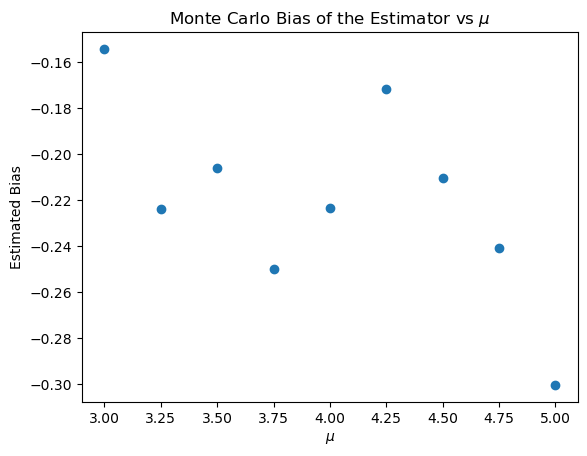

In [15]:
N = 1000
sample_size = 9
mu_values = np.linspace(3, 5, sample_size)
biases = []

for mu in mu_values:
    estimates = []    
    for _ in range(N):
        X = np.random.exponential(scale=mu, size=sample_size)
        X_sorted = np.sort(X)
        estimator = (2 * X_sorted[0] + X_sorted[4] + X_sorted[-1]) / 4
        estimates.append(estimator)
    
    biases.append(np.mean(estimates) - mu)

print(estimates)
print(biases)

# scatter plot of bias vs mu
plt.figure()
plt.scatter(mu_values, biases)
plt.xlabel(r"$\mu$")
plt.ylabel("Estimated Bias")
plt.title("Monte Carlo Bias of the Estimator vs $\\mu$")
plt.show()


In [16]:
avg_bias = np.mean(biases)
print(f"Average of Biases: {avg_bias:.6f}")

Average of Biases: -0.220088


Based on the simulation, we define the corrected estimator
$$\hat{\theta}_1(X) = \hat{\theta}(X) - \bar{b}$$
where \( \bar{b} \) is the average Monte Carlo bias over $[3,5]$.

This choice minimizes the bias **on average** over the interval.

[np.float64(-0.15422577704279306), np.float64(-0.22400531367820165), np.float64(-0.20585574446485522), np.float64(-0.24980846557526526), np.float64(-0.22362237422497921), np.float64(-0.17177671006811046), np.float64(-0.21045419213798944), np.float64(-0.24065351807174373), np.float64(-0.30039150522322444)]
[np.float64(0.0668128588203909), np.float64(0.07224155948318112), np.float64(0.006808299038620014), np.float64(0.003191447902957556), np.float64(-0.060289978491767204), np.float64(0.04065764777072012), np.float64(-0.02485551615063919), np.float64(-0.030186103203941883), np.float64(-0.05858228679538424)]


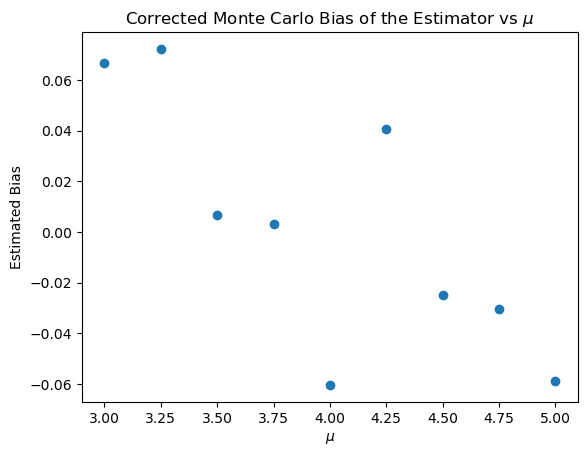

In [17]:
corrected_biases = []
for mu in mu_values:
    estimates = []
    for _ in range(N):
        X = np.random.exponential(scale=mu, size=sample_size)
        X_sorted = np.sort(X)
        
        estimator = (2 * X_sorted[0] + X_sorted[4] + X_sorted[-1]) / 4
        estimator_corrected = estimator - avg_bias
        estimates.append(estimator_corrected)
    
    corrected_biases.append(np.mean(estimates) - mu)

print(biases)
print(corrected_biases)

# scatter plot of bias vs mu
plt.figure()
plt.scatter(mu_values, corrected_biases)
plt.xlabel(r"$\mu$")
plt.ylabel("Estimated Bias")
plt.title("Corrected Monte Carlo Bias of the Estimator vs $\\mu$")
plt.show()


### Chapter 3 - Lecture 7

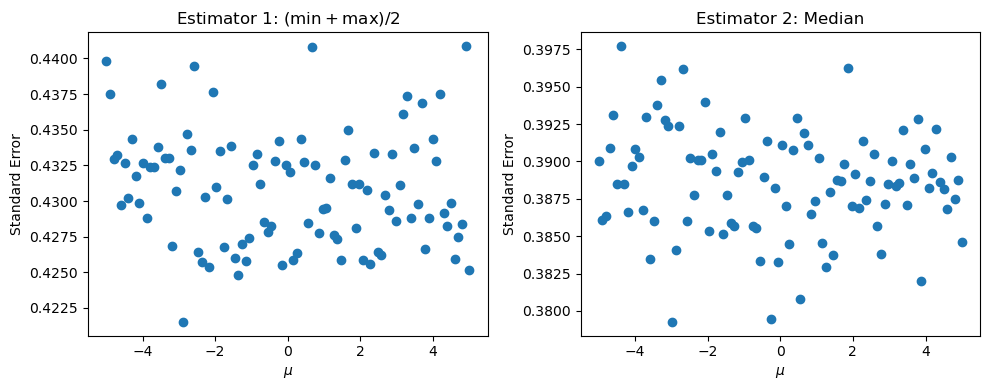

In [18]:
N = 5000          # Monte Carlo repetitions
n = 10            # sample size
mu_values = np.linspace(-5, 5, 100)

se_mu1 = []
se_mu2 = []

for mu in mu_values:
    est1 = []
    est2 = []
    for _ in range(N):
        X = np.random.normal(loc=mu, scale=1.0, size=n)
        X_sorted = np.sort(X)
        mu1 = 0.5 * (X_sorted[0] + X_sorted[-1])
        mu2 = X_sorted[n // 2]   # median for n=10
        est1.append(mu1)
        est2.append(mu2)
    
    se_mu1.append(np.std(est1, ddof=1))
    se_mu2.append(np.std(est2, ddof=1))

# plot
plt.figure(figsize=(10, 4))
# estimator 1
plt.subplot(1, 2, 1)
plt.scatter(mu_values, se_mu1)
plt.xlabel(r"$\mu$")
plt.ylabel("Standard Error")
plt.title(r"Estimator 1: $(\min + \max)/2$")
# estimator 2
plt.subplot(1, 2, 2)
plt.scatter(mu_values, se_mu2)
plt.xlabel(r"$\mu$")
plt.ylabel("Standard Error")
plt.title("Estimator 2: Median")

plt.tight_layout()
plt.show()
